# Data wrangling
| Column    | Description | Data Format | Handling Missing Data |
| -------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------- | ---------------------------------------------------------------- |
| STATE |               | categorical     | done |
| PHYSHLTH | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?                | numeric     | impute 77, 99, BLANK with median of remaining values (1-30) and impute 88 with 0 |
| MENTHLTH | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? | numeric     | impute 77, 99, BLANK with median of remaining values (1-30) and impute 88 with 0 |
| ASTHMA3  | (Ever told) (you had) asthma?                                                                                                                                                    | categorical | done                                                             |
| HAVARTH5 | Has a doctor, nurse or other health professional ever told you that you had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?                          | categorical | let BLANK be another category                                    |
| _MICHD   | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)                                                                            | categorical | let BLANK be another category                                    |

## Load and merge attributes related to states
- Region
- Division
- Percentage of polical party affiliation

In [1]:
import pandas as pd
import numpy as np

In [2]:
responses = pd.read_csv("llcp2021.csv", usecols = [ '_BMI5', '_BMI5CAT','_AGEG5YR', '_STATE', 'PHYSHLTH', 'MENTHLTH','ASTHMA3','HAVARTH5','_MICHD', 'RENTHOM1',
'PRIMINSR', 'EXERANY2'])
responses = responses.dropna(subset=['_BMI5', '_BMI5CAT'])
responses = responses[responses['_AGEG5YR'] != 14]
print(responses.shape)
responses.head()

(387021, 12)


,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT
0,1.0,20.0,10.0,3.0,2.0,1.0,1.0,1.0,2.0,11.0,1454.0,1.0
2,1.0,88.0,88.0,2.0,2.0,2.0,2.0,1.0,1.0,11.0,2829.0,3.0
3,1.0,88.0,10.0,2.0,1.0,2.0,2.0,1.0,2.0,9.0,3347.0,4.0
4,1.0,30.0,88.0,3.0,1.0,2.0,2.0,1.0,1.0,12.0,2873.0,3.0
5,1.0,88.0,88.0,3.0,2.0,2.0,2.0,1.0,2.0,13.0,2437.0,2.0


In [3]:
responses.describe()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT
count,387021.000000,387019.000000,387021.000000,387020.000000,387021.000000,387021.000000,387021.000000,387021.000000,383296.000000,387021.000000,387021.000000,387021.000000
mean,30.765483,62.783982,59.383767,9.703561,1.250483,1.875901,1.698711,1.369223,1.915614,7.622865,2856.804796,3.010183
std,15.418068,36.386319,37.630213,23.335046,0.498091,0.459756,0.620143,0.749144,0.277967,3.563107,655.876084,0.833211
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1200.000000,1.000000
25%,20.000000,21.000000,15.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,5.000000,2414.000000,2.000000
50%,31.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,8.000000,2744.000000,3.000000
75%,42.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,11.000000,3175.000000,4.000000
max,78.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,2.000000,13.000000,9933.000000,4.000000


In [4]:
#https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm

FIPS_codes = pd.read_csv('FIPS_codes.csv')
FIPS_codes.columns = ['State_name', 'State_abb','_STATE']
print(FIPS_codes.shape)

#https://www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/state/
State_party = pd.read_csv('FIPS_codes_party.csv')
State_party.columns = ['State_name', 'Republican', 'No_lean', 'Democrat', 'Sample_size']
print(State_party.shape)
for col in ['Republican', 'No_lean', 'Democrat']:
    State_party[col] = State_party[col].str.rstrip('%').astype('float') / 100.0

State_attributes = FIPS_codes.merge(State_party, on = 'State_name', how = "outer")
print(State_attributes.shape)

#https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv
State_region = pd.read_csv('FIPS_codes_region.csv')
State_region.columns = ['State_name', 'State_abb','Region','Division']
print(State_region.shape)

State_attributes = State_attributes.merge(State_region, on = ['State_name', 'State_abb'], how = "outer")
print(State_attributes.shape)
State_attributes.head()


(53, 3)
(51, 5)
(53, 7)
(51, 4)
(53, 9)


,State_name,State_abb,_STATE,Republican,No_lean,Democrat,Sample_size,Region,Division
0,Alabama,AL,1,0.52,0.13,0.35,511,South,East South Central
1,Alaska,AK,2,0.39,0.29,0.32,310,West,Pacific
2,Arizona,AZ,4,0.40,0.21,0.39,653,West,Mountain
3,Arkansas,AR,5,0.46,0.16,0.38,311,South,West South Central
4,California,CA,6,0.30,0.21,0.49,"3,697",West,Pacific


In [5]:
State_attributes.drop(columns=['Sample_size'], inplace =True)
State_attributes.describe()

,_STATE,Republican,No_lean,Democrat
count,53.000000,51.000000,51.000000,51.000000
mean,30.698113,0.392157,0.177843,0.430000
std,17.883797,0.084506,0.031325,0.083929
min,1.000000,0.110000,0.100000,0.250000
25%,17.000000,0.330000,0.160000,0.385000
50%,30.000000,0.410000,0.180000,0.420000
75%,44.000000,0.440000,0.190000,0.475000
max,78.000000,0.570000,0.290000,0.730000


In [6]:
State_attributes.isna().sum()

State_name    0
State_abb     0
_STATE        0
Republican    2
No_lean       2
Democrat      2
Region        2
Division      2
dtype: int64

In [7]:
State_attributes[State_attributes.isna().any(axis=1)]

,State_name,State_abb,_STATE,Republican,No_lean,Democrat,Region,Division
39,Puerto Rico,PR,72,NaN,NaN,NaN,NaN,NaN
48,Virgin Islands,VI,78,NaN,NaN,NaN,NaN,NaN


In [8]:
mean_Republican = round(State_attributes['Republican'].mean(),2)
print(f"Average proportion of Republican: {mean_Republican}")
mean_Democrat = round(State_attributes['Democrat'].mean(),2)
print(f"Average proportion of Democrat: {mean_Democrat}")
fill_no_lean = 1 - mean_Republican - mean_Democrat
print(f"Compute no lean proportion: {mean_Democrat}")

State_attributes['Republican'].fillna(mean_Republican, inplace =True)
State_attributes['Democrat'].fillna(mean_Democrat, inplace =True)
State_attributes['No_lean'].fillna(fill_no_lean, inplace =True)
State_attributes['Region'].fillna(State_attributes["State_name"], inplace =True)
State_attributes['Division'].fillna(State_attributes["State_name"], inplace =True)


Average proportion of Republican: 0.39
Average proportion of Democrat: 0.43
Compute no lean proportion: 0.43


In [9]:
State_attributes.loc[39], State_attributes.loc[48]

(State_name    Puerto Rico
 State_abb              PR
 _STATE                 72
 Republican           0.39
 No_lean              0.18
 Democrat             0.43
 Region        Puerto Rico
 Division      Puerto Rico
 Name: 39, dtype: object,
 State_name    Virgin Islands
 State_abb                 VI
 _STATE                    78
 Republican              0.39
 No_lean                 0.18
 Democrat                0.43
 Region        Virgin Islands
 Division      Virgin Islands
 Name: 48, dtype: object)

In [10]:
# State_attributes.to_csv("State_attributes.csv", index = False)

In [11]:
state_df = pd.read_csv("State_attributes.csv")
responses = responses.merge(state_df, on = "_STATE")

### Create new columns that categories where the answer to the number days without good physical and metal health are present

In [12]:
conditions  = [ responses['PHYSHLTH']<= 30, responses['PHYSHLTH']== 88,  responses['PHYSHLTH']== 77, responses['PHYSHLTH'] == 99, responses['PHYSHLTH']== np.nan ]
choices     = [ "Present",  "Present", 'Don’t know', 'Rejected', 'Missing' ]
    
responses['PHYSHLTH_CAT'] = np.select(conditions, choices, default= 'Missing')

conditions  = [ responses['MENTHLTH']<= 30, responses['MENTHLTH']== 88,  responses['MENTHLTH']== 77, responses['MENTHLTH'] == 99, responses['MENTHLTH']== np.nan ]
choices     = [ "Present",  "Present", 'Don’t know', 'Rejected', 'Missing' ]
    
responses['MENTHLTH_CAT'] = np.select(conditions, choices, default= 'Missing')

conditions  = [ responses['_BMI5CAT'] == 1, responses['_BMI5CAT']== 2, responses['_BMI5CAT'] == 3, responses['_BMI5CAT'] == 4 ]
choices     = [ "Underweight", 'Normal Weight', 'Overweight', 'Obese']
    
responses['BMI5CAT'] = np.select(conditions, choices, default=np.nan)

print(responses['PHYSHLTH_CAT'].unique(), responses['BMI5CAT'].unique())

['Present' 'Don’t know' 'Rejected' 'Missing'] ['Underweight' 'Overweight' 'Obese' 'Normal Weight']


In [13]:
def replace_PHS_MEN_median(df, colname):
    med_30less = df[df[colname]<= 30][[colname]].median()
    print(med_30less)

    df[colname].fillna(med_30less, inplace = True)
    #replace None with 0
    df.replace({colname: { np.nan:med_30less, 77:med_30less,  88:0, 99:med_30less}}, inplace = True)
    return df

responses = replace_PHS_MEN_median(responses, 'PHYSHLTH')
responses = replace_PHS_MEN_median(responses, 'MENTHLTH')
responses.describe()


#check if any columns with nan left 
responses.columns[responses.isna().any()].tolist()

PHYSHLTH    6.0
dtype: float64
MENTHLTH    7.0
dtype: float64


['PRIMINSR', '_MICHD']

In [14]:
def create_str_cat(df, colnames):
    for colname in colnames:
        print(df[colname].unique())
        df[colname].fillna('BLANK', inplace = True)
        df.replace({colname: {1:'Yes',  2:'No', 7:'Not Sure', 9:'Refused',  np.nan:'BLANK'}}, inplace = True)
        print(df[colname].unique())
    return df

responses = create_str_cat(responses, ['_MICHD', 'HAVARTH5'])


[ 2.  1. nan]
['No' 'Yes' 'BLANK']
[1. 2. 7. 9.]
['Yes' 'No' 'Not Sure' 'Refused']


In [15]:
responses.dtypes

_STATE          float64
PHYSHLTH        float64
MENTHLTH        float64
PRIMINSR        float64
EXERANY2        float64
ASTHMA3         float64
HAVARTH5         object
RENTHOM1        float64
_MICHD           object
_AGEG5YR        float64
_BMI5           float64
_BMI5CAT        float64
State_name       object
State_abb        object
Republican      float64
No_lean         float64
Democrat        float64
Region           object
Division         object
PHYSHLTH_CAT     object
MENTHLTH_CAT     object
BMI5CAT          object
dtype: object

In [16]:
responses.columns[responses.isna().any()].tolist()

['PRIMINSR']

In [17]:
responses.head()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,...,State_name,State_abb,Republican,No_lean,Democrat,Region,Division,PHYSHLTH_CAT,MENTHLTH_CAT,BMI5CAT
0,1.0,20.0,10.0,3.0,2.0,1.0,Yes,1.0,No,11.0,...,Alabama,AL,0.52,0.13,0.35,South,East South Central,Present,Present,Underweight
1,1.0,0.0,0.0,2.0,2.0,2.0,No,1.0,Yes,11.0,...,Alabama,AL,0.52,0.13,0.35,South,East South Central,Present,Present,Overweight
2,1.0,0.0,10.0,2.0,1.0,2.0,No,1.0,No,9.0,...,Alabama,AL,0.52,0.13,0.35,South,East South Central,Present,Present,Obese
3,1.0,30.0,0.0,3.0,1.0,2.0,No,1.0,Yes,12.0,...,Alabama,AL,0.52,0.13,0.35,South,East South Central,Present,Present,Overweight
4,1.0,0.0,0.0,3.0,2.0,2.0,No,1.0,No,13.0,...,Alabama,AL,0.52,0.13,0.35,South,East South Central,Present,Present,Normal Weight


In [18]:
# Rent
print(responses['RENTHOM1'].unique())
responses['RENTHOM1'].fillna('BLANK', inplace = True)
responses.replace({'RENTHOM1': {1:'Own',  2:'Rent', 3:'Other', 7:'BLANK', 9:'BLANK',  np.nan:'BLANK'}}, inplace = True)
print(responses['RENTHOM1'].unique())


[1. 3. 2. 9. 7.]


['Own' 'Other' 'Rent' 'BLANK']


In [19]:
# Primary Insurance
responses['PRIMINSR'].fillna('BLANK', inplace = True)
responses.replace({'PRIMINSR': {1:'Employer',  2:'Private', 3:'Medicare', 4:'Medigap',  5:'Medicaid', 6:'Children Health Insurance Program', 7:'Military', 8:'Indian Health Service', 9:'State sponsored', 10:'Other government',  88:'No coverage', 77:'BLANK', 99:'BLANK', np.nan:'BLANK'}}, inplace = True)
print(responses['PRIMINSR'].unique())

['Medicare' 'Private' 'Employer' 'BLANK' 'No coverage' 'Medicaid'
 'Military' 'Other government' 'State sponsored' 'Medigap'
 'Indian Health Service' 'Children Health Insurance Program']


In [20]:
# Exercise in Past 30 Days 
print(responses['EXERANY2'].unique())
responses['EXERANY2'].fillna('BLANK', inplace = True)
responses.replace({'EXERANY2': {1:'Yes',  2:'No', 3:'Other', 7:'BLANK', 9:'BLANK',  np.nan:'BLANK'}}, inplace = True)
print(responses['EXERANY2'].unique())


[2. 1. 7. 9.]
['No' 'Yes' 'BLANK']


In [21]:
responses.columns[responses.isna().any()].tolist()

[]

# Exploratory Data Analysis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


def boxplot_BMI(colname, plt_title):
    sns.boxplot(data=responses, x=colname, y='_BMI5')
    plt.xlabel(f"{colname}")
    plt.ylabel(f"BMI")
    plt.title(plt_title)

def get_bmi_prop(colname):
    bmi_prop = responses[['BMI5CAT',colname]].groupby(['BMI5CAT',colname]).size()/ responses.groupby('BMI5CAT')[colname].size()
    bmi_prop=bmi_prop.reset_index()
    order=["Underweight", 'Normal Weight', 'Overweight', 'Obese']
    bmi_prop.pivot(index='BMI5CAT', columns=colname, values=0).loc[order].plot.bar(ylabel ="proportion")
    return bmi_prop

def boxplot_phy_ment(colname, type_plot):
    bmi_cont = responses[responses[colname]<= 30]
    sns.boxplot(data=bmi_cont, x='BMI5CAT', y=colname, order=["Underweight", 'Normal Weight', 'Overweight', 'Obese'])
    plt.xlabel("BMI Category")
    plt.ylabel(f"Number of days without good {type_plot} health")
    return bmi_cont 


### 1) `PHYSHLTH_CAT`: number of days without good physical health

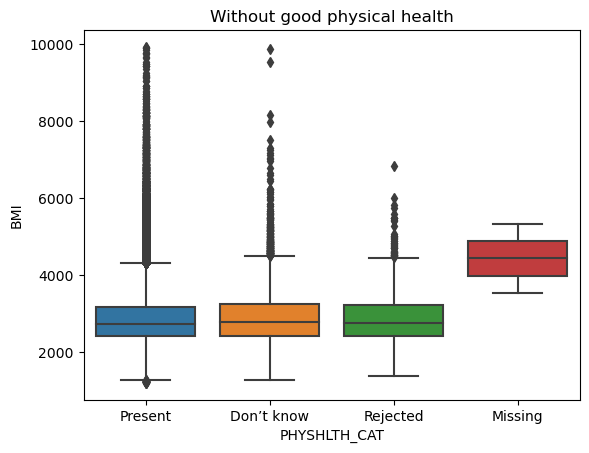

In [23]:
boxplot_BMI("PHYSHLTH_CAT", "Without good physical health")

,BMI5CAT,PHYSHLTH_CAT,0
0,Normal Weight,Don’t know,0.015463
1,Normal Weight,Present,0.981651
2,Normal Weight,Rejected,0.002886
3,Obese,Don’t know,0.018086
4,Obese,Missing,0.000015
5,Obese,Present,0.978813
6,Obese,Rejected,0.003085
7,Overweight,Don’t know,0.015525
8,Overweight,Present,0.981564
9,Overweight,Rejected,0.002911


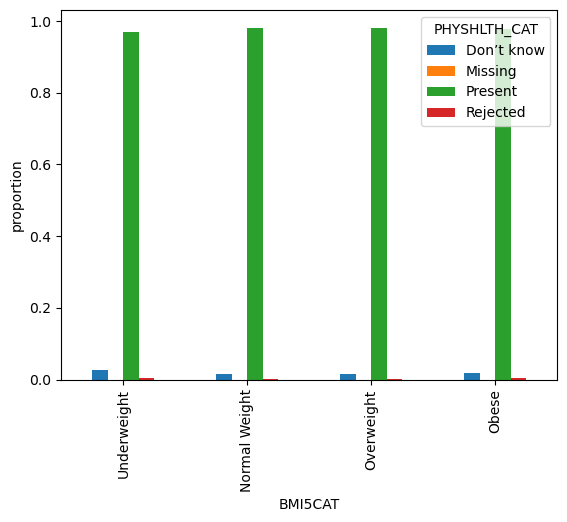

In [24]:
get_bmi_prop('PHYSHLTH_CAT')

### Boxplot distribution of number of days without good physical health for each BMI categories 

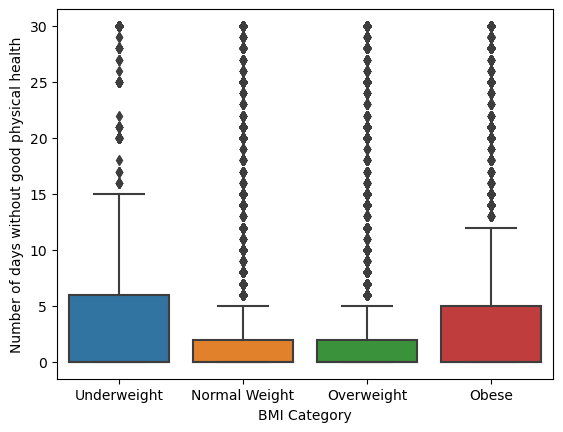

In [25]:
bmi_phs_cont = boxplot_phy_ment('PHYSHLTH', 'physical')

### 2) `MENTHLTH` number of days without good mental health

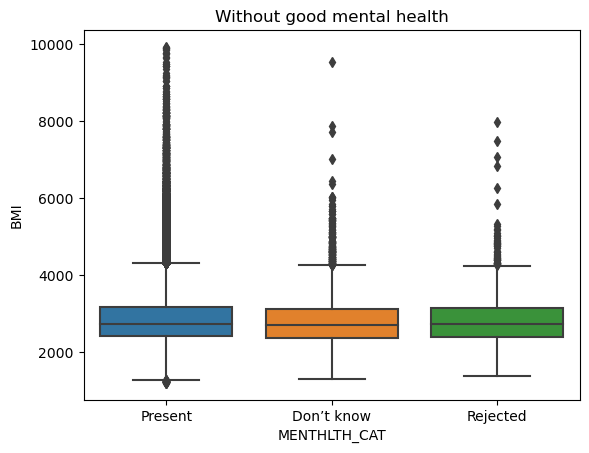

In [26]:
boxplot_BMI("MENTHLTH_CAT", "Without good mental health")

,BMI5CAT,PHYSHLTH_CAT,0
0,Normal Weight,Don’t know,0.015463
1,Normal Weight,Present,0.981651
2,Normal Weight,Rejected,0.002886
3,Obese,Don’t know,0.018086
4,Obese,Missing,0.000015
5,Obese,Present,0.978813
6,Obese,Rejected,0.003085
7,Overweight,Don’t know,0.015525
8,Overweight,Present,0.981564
9,Overweight,Rejected,0.002911


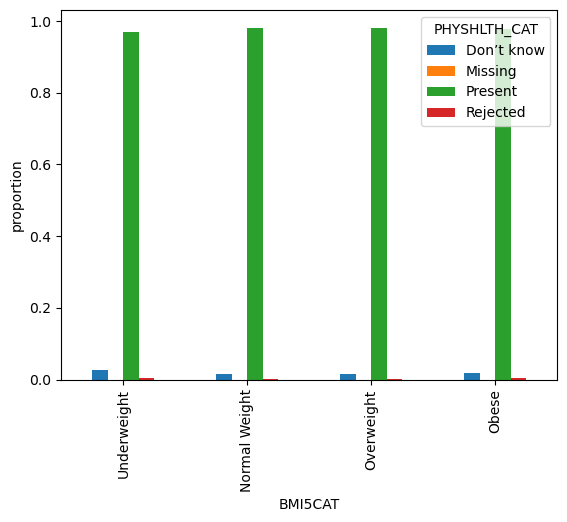

In [27]:
get_bmi_prop('PHYSHLTH_CAT')

### Boxplot distribution of number of days without good mental health for each BMI categories 

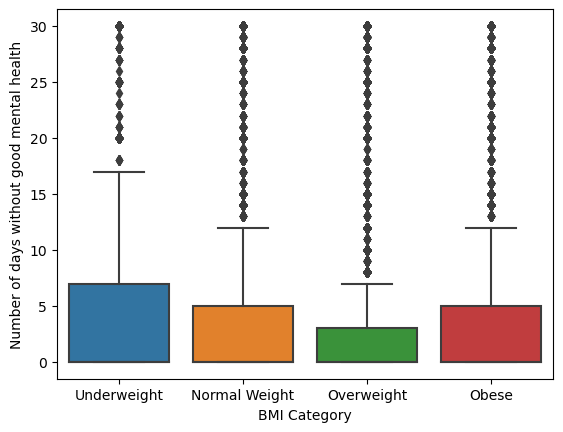

In [28]:
bmi_ment_cont = boxplot_phy_ment('MENTHLTH', 'mental')

In [29]:
import gc
del bmi_phs_cont, bmi_ment_cont
gc.collect()

19138

In [30]:
# Drop misc. values
responses = responses[(responses['EXERANY2'] != 'BLANK')
      & (responses['ASTHMA3'] != 'Not Sure') & (responses['ASTHMA3'] != 'Refused')
      & (responses['HAVARTH5'] != 'Not Sure') & (responses['HAVARTH5'] != 'Refused')
      & (responses['RENTHOM1'] != 'BLANK')
      & (responses['_MICHD'] != 'BLANK')
      & (responses['PRIMINSR'] != 'BLANK')]

responses.drop(columns = 'Division', inplace = True)

### 3) `Asthma`

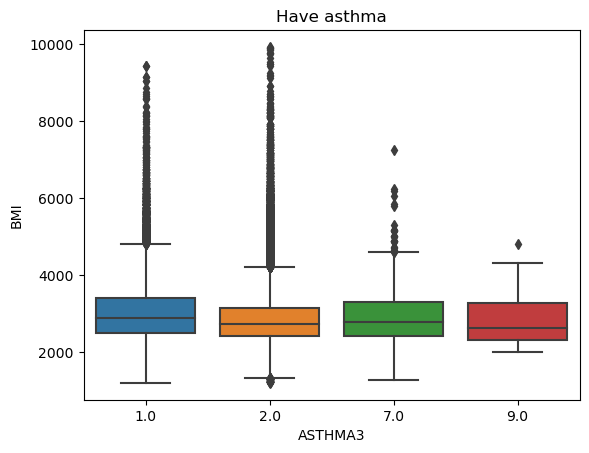

In [31]:
boxplot_BMI("ASTHMA3", "Have asthma")


,BMI5CAT,ASTHMA3,0
0,Normal Weight,1.0,0.115761
1,Normal Weight,2.0,0.881711
2,Normal Weight,7.0,0.002434
3,Normal Weight,9.0,0.000094
4,Obese,1.0,0.181926
5,Obese,2.0,0.814988
6,Obese,7.0,0.003013
7,Obese,9.0,0.000073
8,Overweight,1.0,0.121058
9,Overweight,2.0,0.876380


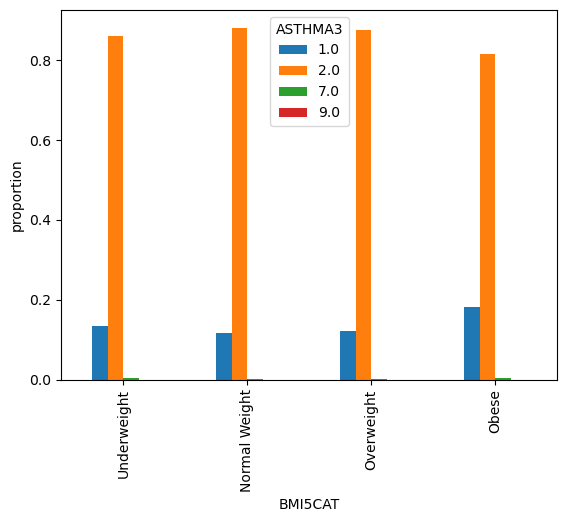

In [32]:
get_bmi_prop('ASTHMA3')

### 4) `HAVARTH5`: arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia

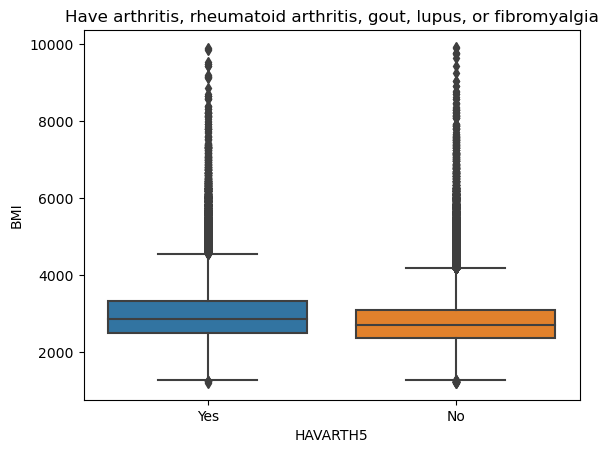

In [33]:
boxplot_BMI("HAVARTH5", "Have arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia")

,BMI5CAT,HAVARTH5,0
0,Normal Weight,No,0.736025
1,Normal Weight,Yes,0.263975
2,Obese,No,0.591291
3,Obese,Yes,0.408709
4,Overweight,No,0.682326
5,Overweight,Yes,0.317674
6,Underweight,No,0.715537
7,Underweight,Yes,0.284463


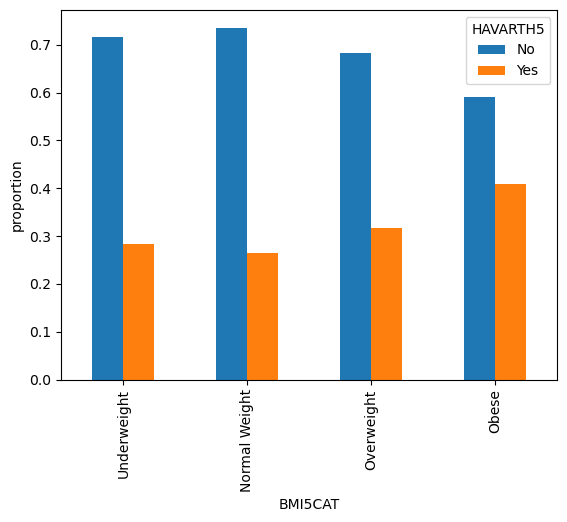

In [34]:
get_bmi_prop('HAVARTH5')

### 5) `_MICHD` coronary heart disease (CHD) or myocardial infarction (MI)

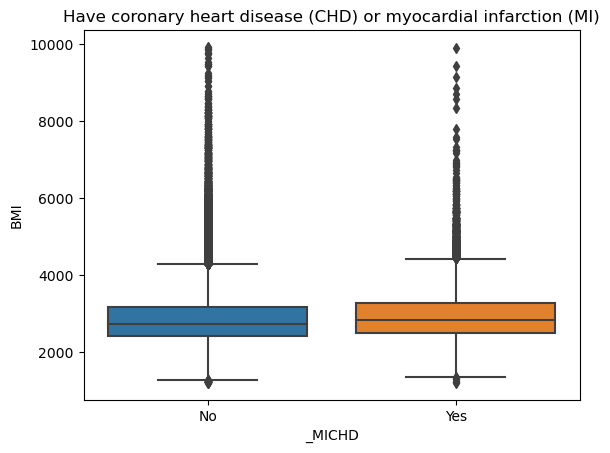

In [35]:
boxplot_BMI("_MICHD", "Have coronary heart disease (CHD) or myocardial infarction (MI)")

,BMI5CAT,_MICHD,0
0,Normal Weight,No,0.934233
1,Normal Weight,Yes,0.065767
2,Obese,No,0.901456
3,Obese,Yes,0.098544
4,Overweight,No,0.913648
5,Overweight,Yes,0.086352
6,Underweight,No,0.917397
7,Underweight,Yes,0.082603


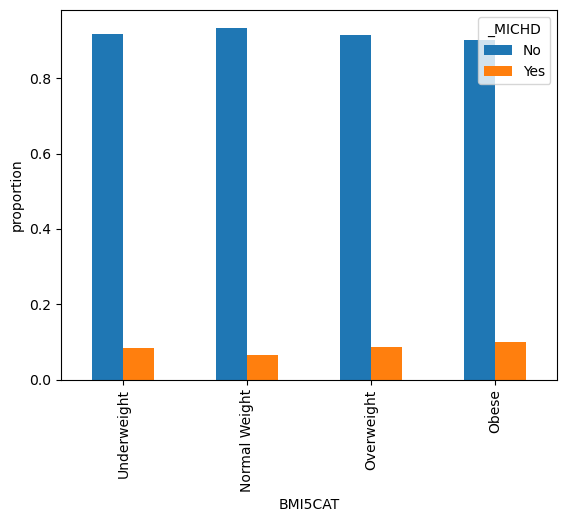

In [36]:
get_bmi_prop('_MICHD')

### `Region`: U.S. states 

,BMI5CAT,Region,0
0,Normal Weight,Midwest,0.270968
1,Normal Weight,Northeast,0.235004
2,Normal Weight,Puerto Rico,0.008864
3,Normal Weight,South,0.231157
4,Normal Weight,Virgin Islands,0.003154
5,Normal Weight,West,0.250852
6,Obese,Midwest,0.316580
7,Obese,Northeast,0.203342
8,Obese,Puerto Rico,0.010992
9,Obese,South,0.264286


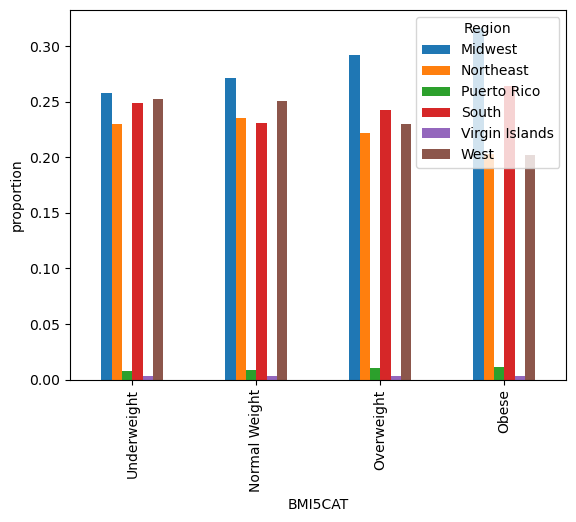

In [37]:
get_bmi_prop('Region')

In [38]:
def get_bmi_prop_reverse(colname, plt_title):
    bmi_prop = responses[['BMI5CAT',colname]].groupby(['BMI5CAT',colname]).size()/ responses.groupby(colname)['BMI5CAT'].size()
    bmi_prop=bmi_prop.reset_index()
    bmi_prop.pivot(index=colname, columns='BMI5CAT', values=0).plot.bar(title = plt_title)
    return bmi_prop

,BMI5CAT,Region,0
0,Normal Weight,Midwest,0.269472
1,Normal Weight,Northeast,0.312551
2,Normal Weight,Puerto Rico,0.253480
3,Normal Weight,South,0.273756
4,Normal Weight,Virgin Islands,0.294580
5,Normal Weight,West,0.322794
6,Obese,Midwest,0.363826
7,Obese,Northeast,0.312526
8,Obese,Puerto Rico,0.363223
9,Obese,South,0.361697


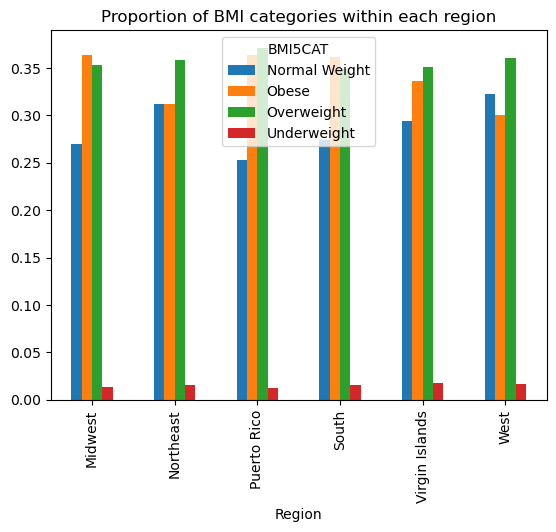

In [39]:
get_bmi_prop_reverse('Region', 'Proportion of BMI categories within each region')

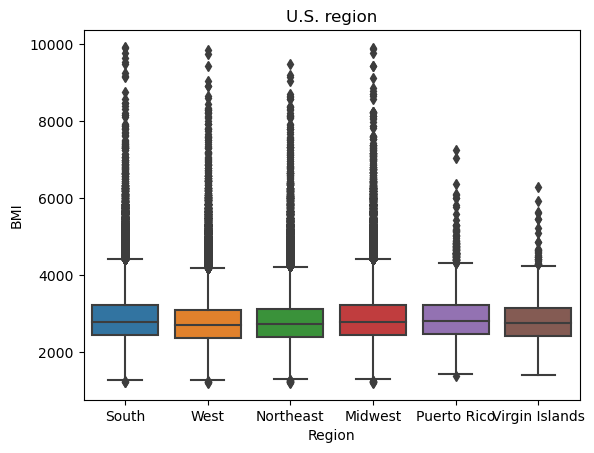

In [40]:
boxplot_BMI("Region", "U.S. region")

In [41]:
# !pip install plotly-express
# !pip install --upgrade nbformat

In [42]:
responses.columns

Index(['_STATE', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'EXERANY2', 'ASTHMA3',
       'HAVARTH5', 'RENTHOM1', '_MICHD', '_AGEG5YR', '_BMI5', '_BMI5CAT',
       'State_name', 'State_abb', 'Republican', 'No_lean', 'Democrat',
       'Region', 'PHYSHLTH_CAT', 'MENTHLTH_CAT', 'BMI5CAT'],
      dtype='object')

In [43]:
import plotly.express as px


state_obese = pd.DataFrame(responses[["State_abb", "_BMI5CAT"]].groupby(["State_abb", "_BMI5CAT"]).size()/responses[["State_abb", "_BMI5CAT"]].groupby(["State_abb"]).size()*100).reset_index()

def US_Map(BMI_type):
    state_bmi = state_obese.copy()
    state_bmi = state_bmi[state_bmi["_BMI5CAT"] == BMI_type]
    if BMI_type == 4:
        BMI_type_col = 'Percentage of obese'
    elif BMI_type == 3:  
        BMI_type_col = 'Percentage of overweight'  
    elif BMI_type == 2:  
        BMI_type_col = 'Percentage of normal weight'  
    elif BMI_type == 1:  
        BMI_type_col = 'Percentage of underweight'  

    state_bmi.columns = ["State_abb",	"_BMI5CAT", "percent (%)"]

    highest_percent = round(state_bmi["percent (%)"].max())
    highest_State_abb = state_bmi.iloc[state_bmi["percent (%)"].argmax()]["State_abb"]
    lowest_percent = round(state_bmi["percent (%)"].min())
    lowest_State_abb = state_bmi.iloc[state_bmi["percent (%)"].argmin()]["State_abb"]
    print("Highest:", responses[responses["State_abb"] == highest_State_abb]["State_name"].unique()[0], highest_percent, "%")
    print("Lowest:", responses[responses["State_abb"] == lowest_State_abb]["State_name"].unique()[0], lowest_percent, "%")
    fig = px.choropleth(state_bmi,
                    locations='State_abb', 
                    locationmode="USA-states", 
                    scope="usa",
                    color="percent (%)",
                    color_continuous_scale="Viridis_r", 
                    )
    fig.update_layout(
        title_text = f'{BMI_type_col} in each U.S. state',
        title_font_family="Times New Roman",
        title_font_size = 22,
        title_font_color="black", 
        title_x=0.45, 
        height=400,
        width=600
        )
    fig.show()


In [44]:
US_Map(4)

Highest: West Virginia 41 %
Lowest: District of Columbia 23 %


In [45]:
US_Map(3)

Highest: Rhode Island 38 %
Lowest: District of Columbia 33 %


In [46]:
US_Map(2)

Highest: District of Columbia 42 %
Lowest: West Virginia 24 %


In [47]:
US_Map(1)

Highest: Hawaii 2 %
Lowest: Alaska 1 %


## Correlation plot 

dummy code categorical variables ASTHMA3, HAVARTH5, _MICHD, Region

In [48]:
corr_df =  responses[[ '_BMI5', '_AGEG5YR', 'PHYSHLTH', 'MENTHLTH','ASTHMA3','HAVARTH5','_MICHD', 'Republican',	'No_lean',	'Democrat', 'Region']]
corr_df = pd.get_dummies(data=corr_df, columns=['ASTHMA3','HAVARTH5','_MICHD','Region'])
corr_df.head()

,_BMI5,_AGEG5YR,PHYSHLTH,MENTHLTH,Republican,No_lean,Democrat,ASTHMA3_1.0,ASTHMA3_2.0,ASTHMA3_7.0,...,HAVARTH5_No,HAVARTH5_Yes,_MICHD_No,_MICHD_Yes,Region_Midwest,Region_Northeast,Region_Puerto Rico,Region_South,Region_Virgin Islands,Region_West
0,1454.0,11.0,20.0,10.0,0.52,0.13,0.35,1,0,0,...,0,1,1,0,0,0,0,1,0,0
1,2829.0,11.0,0.0,0.0,0.52,0.13,0.35,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,3347.0,9.0,0.0,10.0,0.52,0.13,0.35,0,1,0,...,1,0,1,0,0,0,0,1,0,0
3,2873.0,12.0,30.0,0.0,0.52,0.13,0.35,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4,2437.0,13.0,0.0,0.0,0.52,0.13,0.35,0,1,0,...,1,0,1,0,0,0,0,1,0,0


<Axes: >

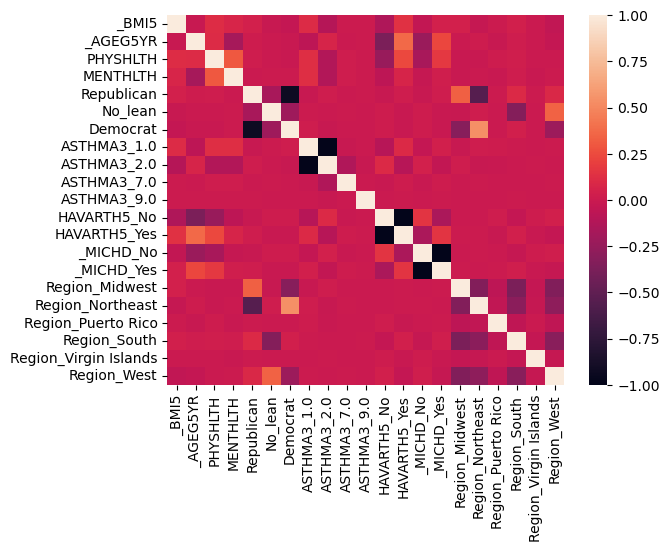

In [49]:
sns.heatmap(corr_df.corr())
